In [1]:
import numpy as np

#加载数据
data = np.loadtxt(fname='./线性数据.csv', delimiter='\t')

#标准化
data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [2]:
#常量
N, M = x.shape

#变量
w = np.ones(M)
b = 0

#初始化S为全0
S_w = np.zeros(M)
S_b = 0

S_w

array([0., 0., 0., 0., 0.])

In [3]:
#预测函数
def predict(x):
    return w.dot(x) + b


predict(x[0])

0.6590042695516539

In [4]:
#求loss,MSELoss
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y)**2
    return loss


get_loss(x[0], y[0])

0.21258140154187247

In [5]:
def get_gradient(x, y):
    global w
    global b

    eps = 1e-3

    loss_before = get_loss(x, y)

    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps

    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps

    return gradient_w, gradient_b


get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.923131013558981)

In [6]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss


total_loss()

11073.905141728206

In [7]:
plt_x = []
plt_y = []
for epoch in range(2500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])

    #和adagrad唯一的区别,就是多了两个系数,也就是0.2和0.8
    #rmsprop是对adagrad的一个改进,在adagrad中lr是单调递减的.
    #但是在rmsprop中lr可能上升
    S_w = 0.2 * S_w + 0.8 * gradient_w**2
    S_b = 0.2 * S_b + 0.8 * gradient_b**2

    #这部分和adagrad没有任何区别
    lr_w = 1e-2 / ((S_w + 1e-6)**0.5)
    lr_b = 1e-2 / ((S_b + 1e-6)**0.5)

    w -= gradient_w * lr_w
    b -= gradient_b * lr_b

    plt_x.append(epoch)
    plt_y.append(total_loss())

    if epoch % 150 == 0:
        print(epoch, lr_w, lr_b, total_loss())

0 [0.03958159 0.27025833 0.02398688 0.01927508 0.14615574] 0.02361214173223676 11034.03164331331
150 [0.01700978 0.00293627 0.0021465  0.01023901 0.00448094] 0.003719994094799524 4979.224195964695
300 [0.00829406 0.00826238 0.00945628 0.00486571 0.0103127 ] 0.005582488611823308 2445.161940545668
450 [0.01226147 0.00684182 0.00416034 0.00593345 0.01256688] 0.0073519130363967405 1287.875118994094
600 [0.00844093 0.00312082 0.00452767 0.00758828 0.01187385] 0.005493573161449282 900.6215520780013
750 [0.11670921 0.0705885  0.03646915 0.02734915 0.06524709] 0.035692618382221694 856.7360048285658
900 [0.02025476 0.00948149 0.01460042 0.00809648 0.01693454] 0.010210937205585344 861.214203341397
1050 [0.00352351 0.00110735 0.00243044 0.0021937  0.00365707] 0.0028662399277710917 775.9776614647038
1200 [0.01246372 0.02360818 0.03399182 0.01082176 0.0318842 ] 0.014019808468636433 814.0867444440322
1350 [0.00640614 0.00549365 0.00637767 0.00851496 0.00876002] 0.006243274919967881 827.8446015140992

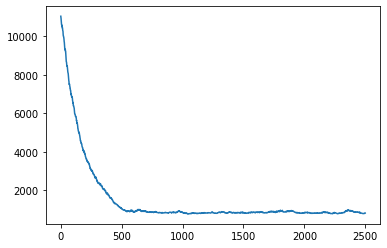

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()